# 예제 1. Exploratory Data Analysis (EDA)
EDA를 사용하여 유방암 데이터셋을 분석해보자

In [ ]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
cancer = load_breast_cancer()

print('데이터셋 입력: ', cancer.feature_names)

print('==========================================================')
print('데이터셋 출력: ', cancer.target_names)

print('==========================================================')
print('입력 데이터 Shape: ', cancer.data.shape)
print('출력 데이터 Shape: ', cancer.target.shape)
print('==========================================================')
print('malignant(악성) =>',cancer.data[cancer.target==0].shape)
print('benign(양성) =>',cancer.data[cancer.target==1].shape)

데이터셋 입력:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
데이터셋 출력:  ['malignant' 'benign']
입력 데이터 Shape:  (569, 30)
출력 데이터 Shape:  (569,)
malignant(악성) => (212, 30)
benign(양성) => (357, 30)


In [ ]:
# DataFrame으로 만들기
x_data = pd.DataFrame(cancer.data, columns = cancer.feature_names)
y_data = pd.DataFrame(cancer.target)
x_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# 악성 target을 갖는 x_data 만 추출
malignant = x_data[y_data[0] == 0]

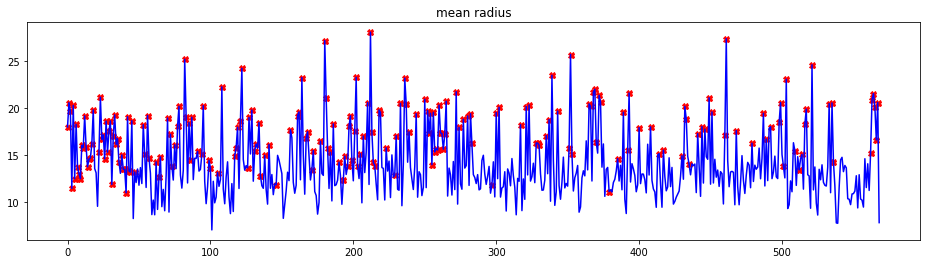

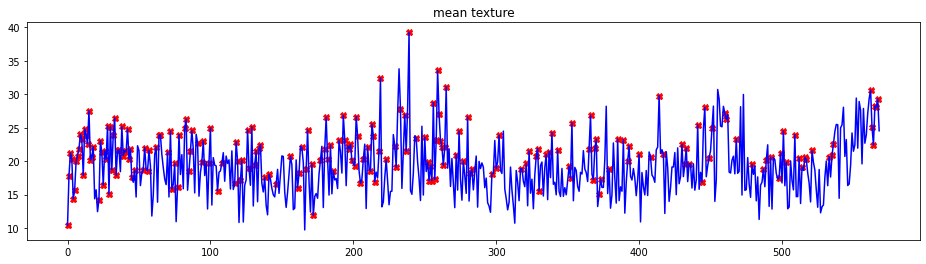

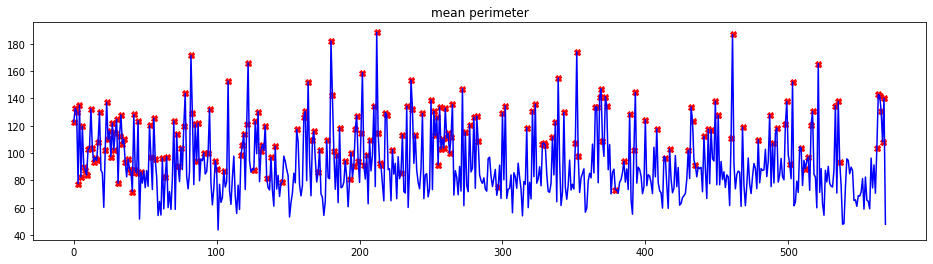

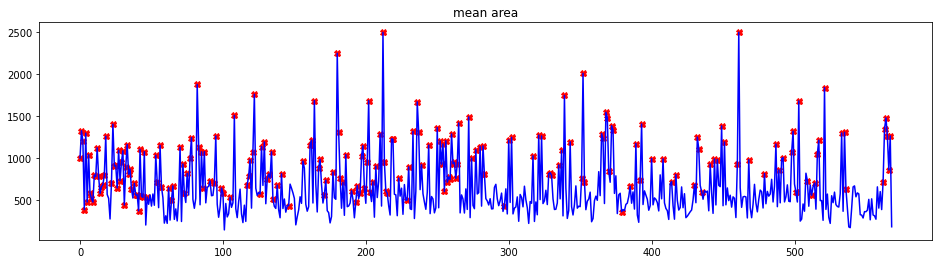

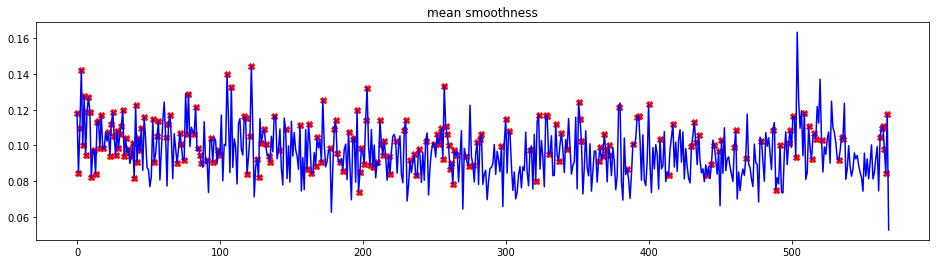

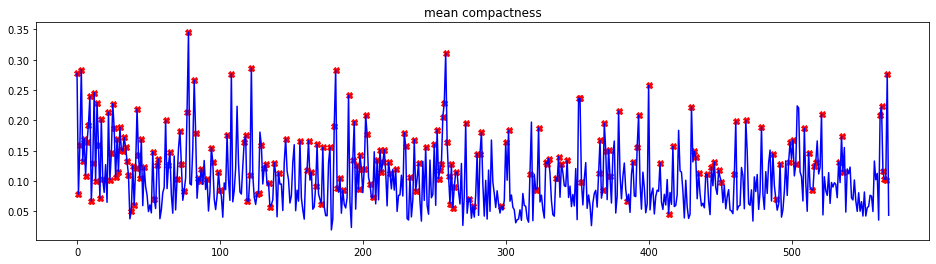

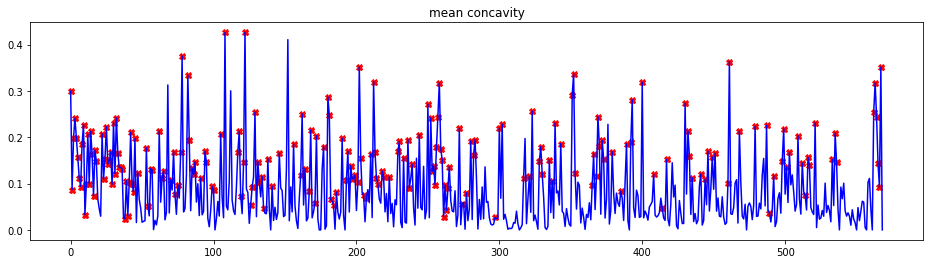

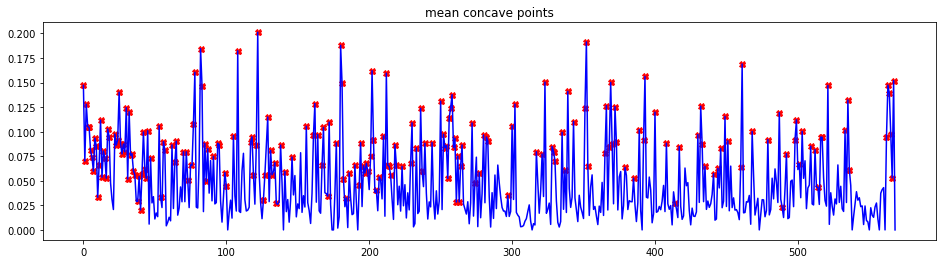

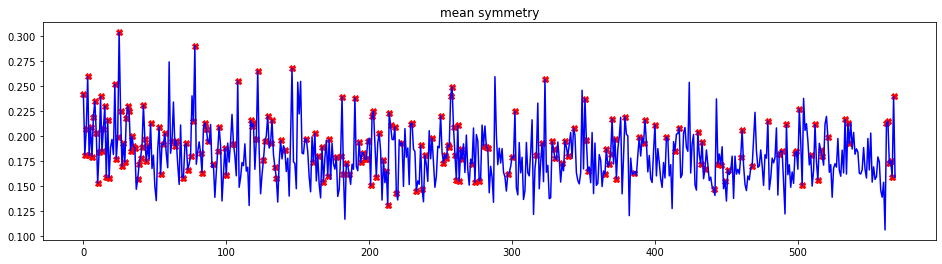

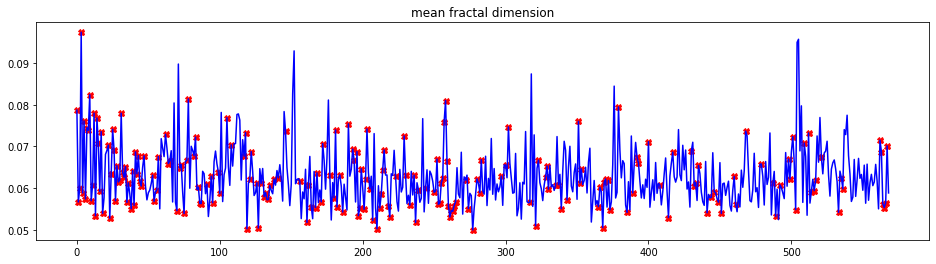

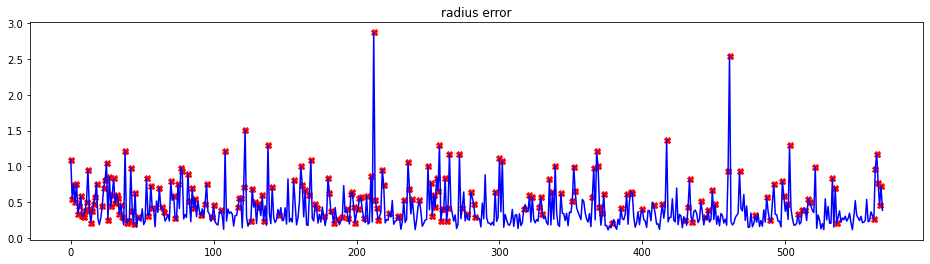

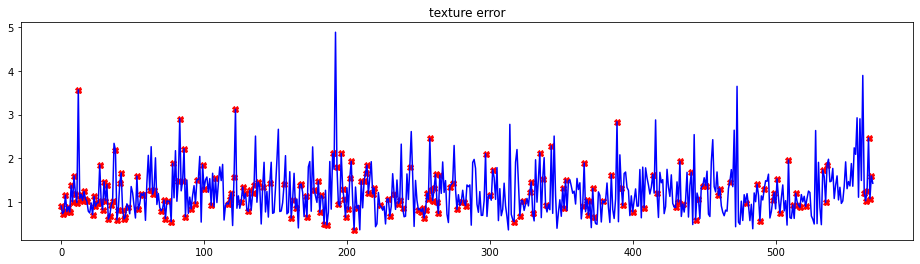

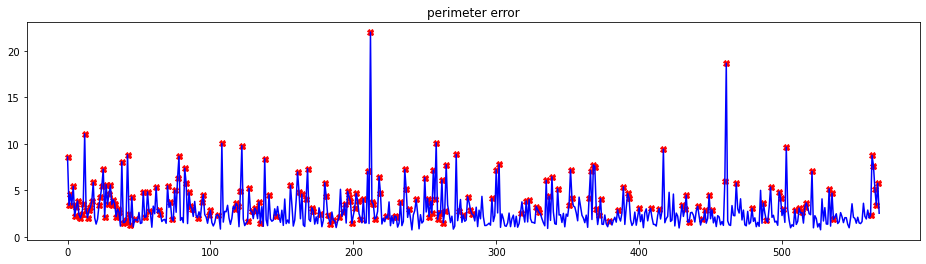

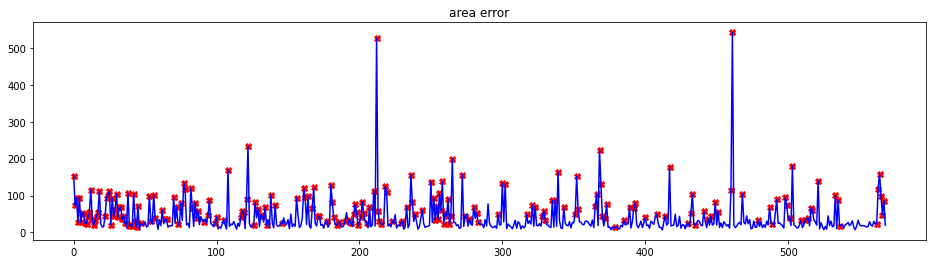

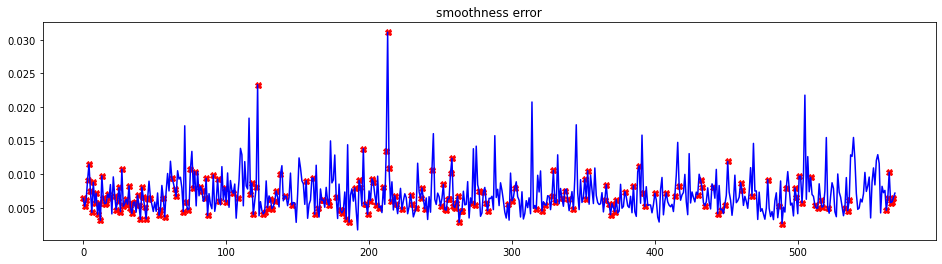

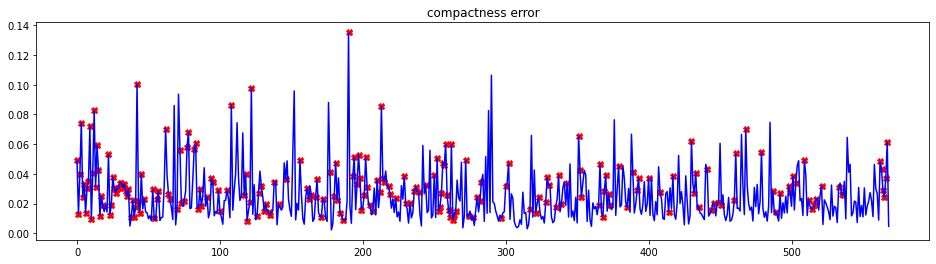

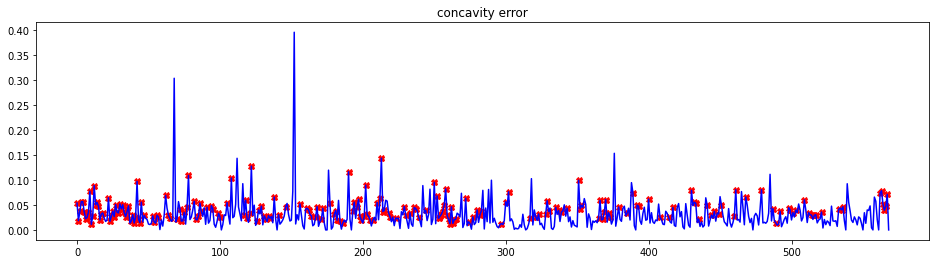

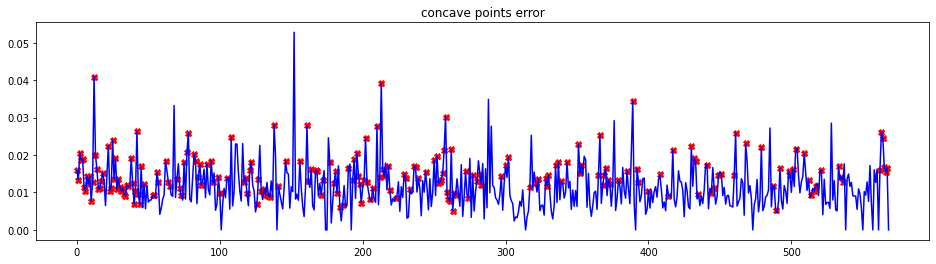

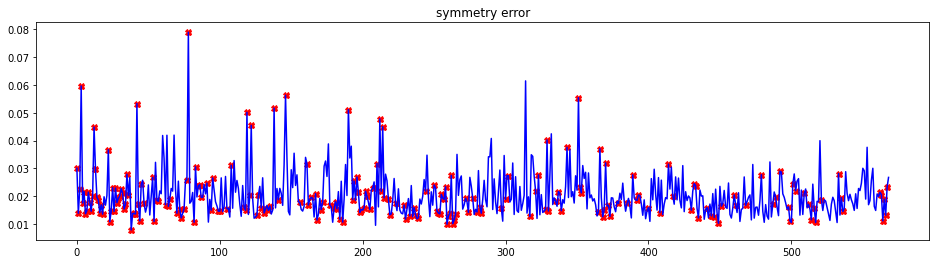

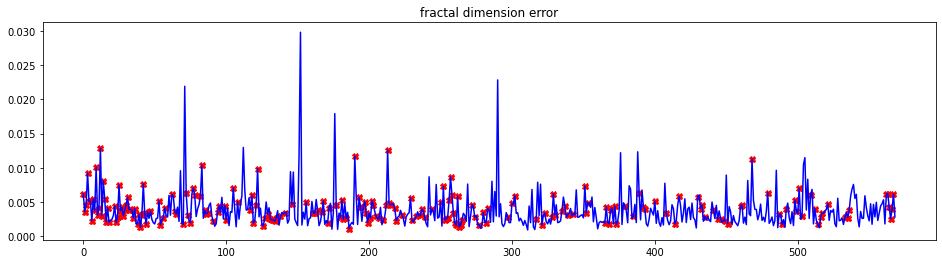

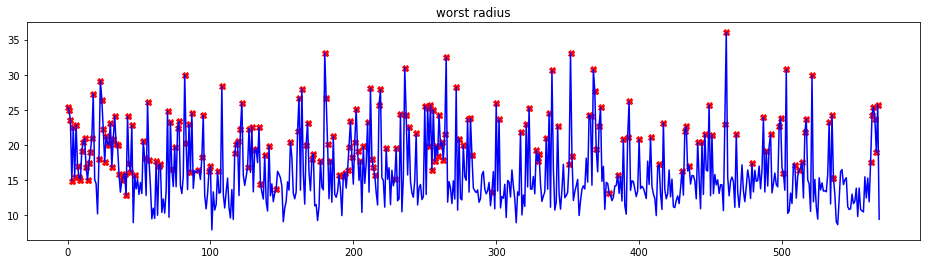

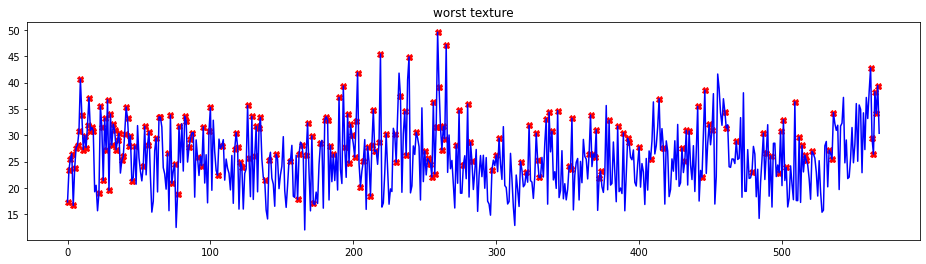

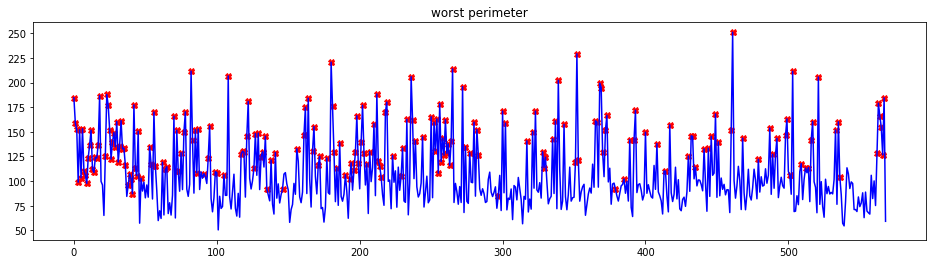

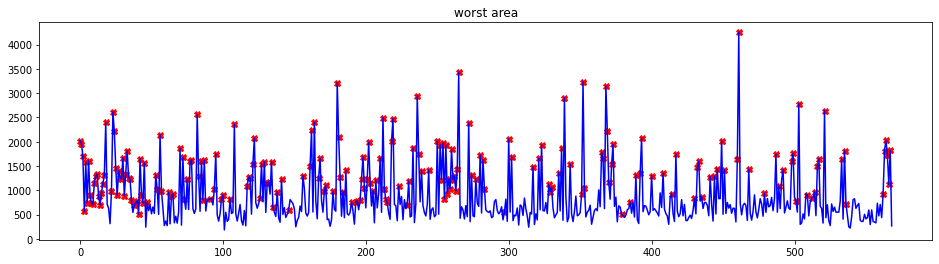

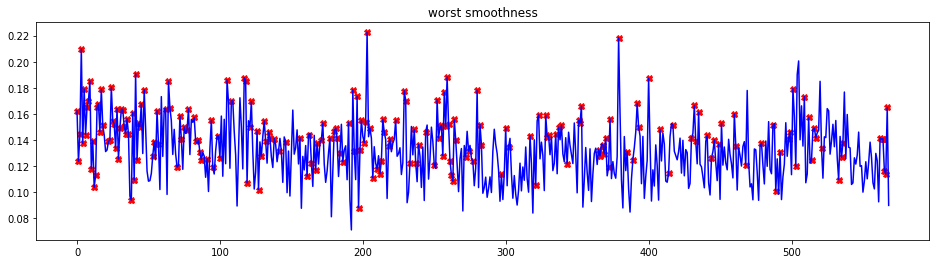

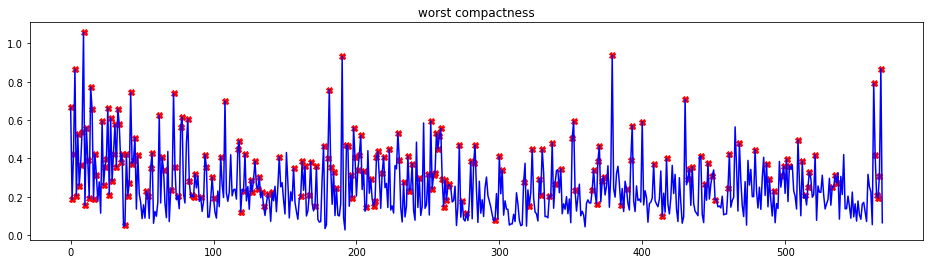

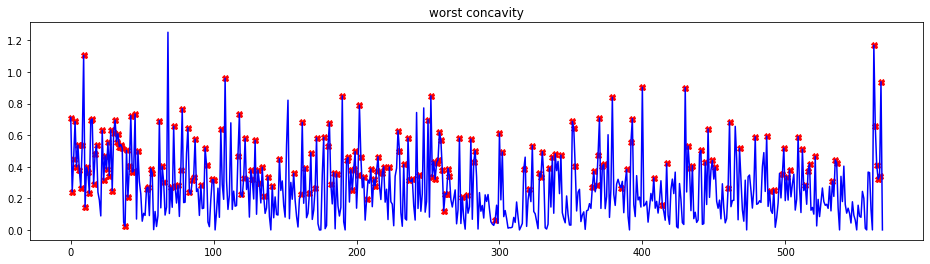

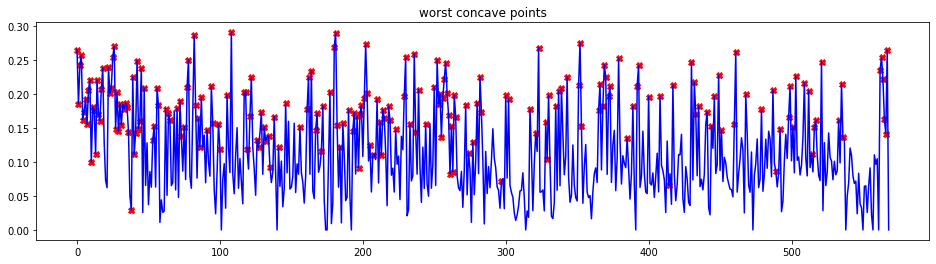

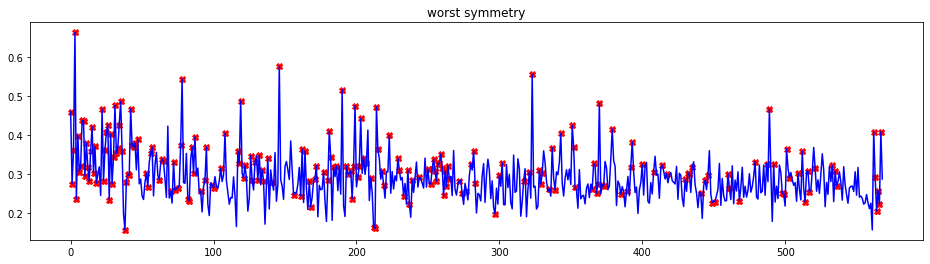

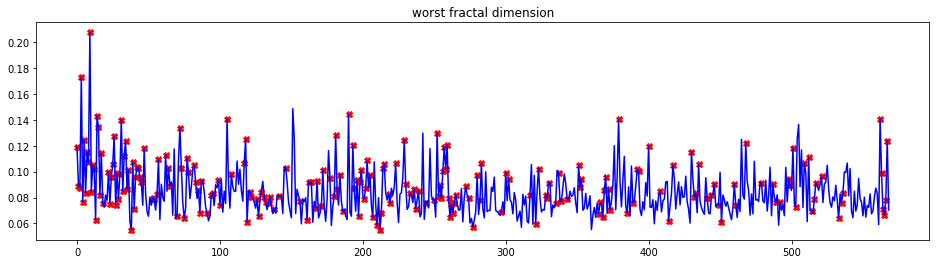

In [ ]:
for n in cancer.feature_names:
    _ = plt.figure(figsize=(16,4))
    _ = plt.plot(malignant[n], linestyle='none', marker='X', color='red', markersize=6)
    _ = plt.plot(x_data[n], color='blue')
    _ = plt.title(n)
    plt.show()

**입력 데이터간 Correlation을 확인해보자!**



In [ ]:
corr = x_data.corr(method='pearson')

In [ ]:
mask = np.tril(x_data.corr())

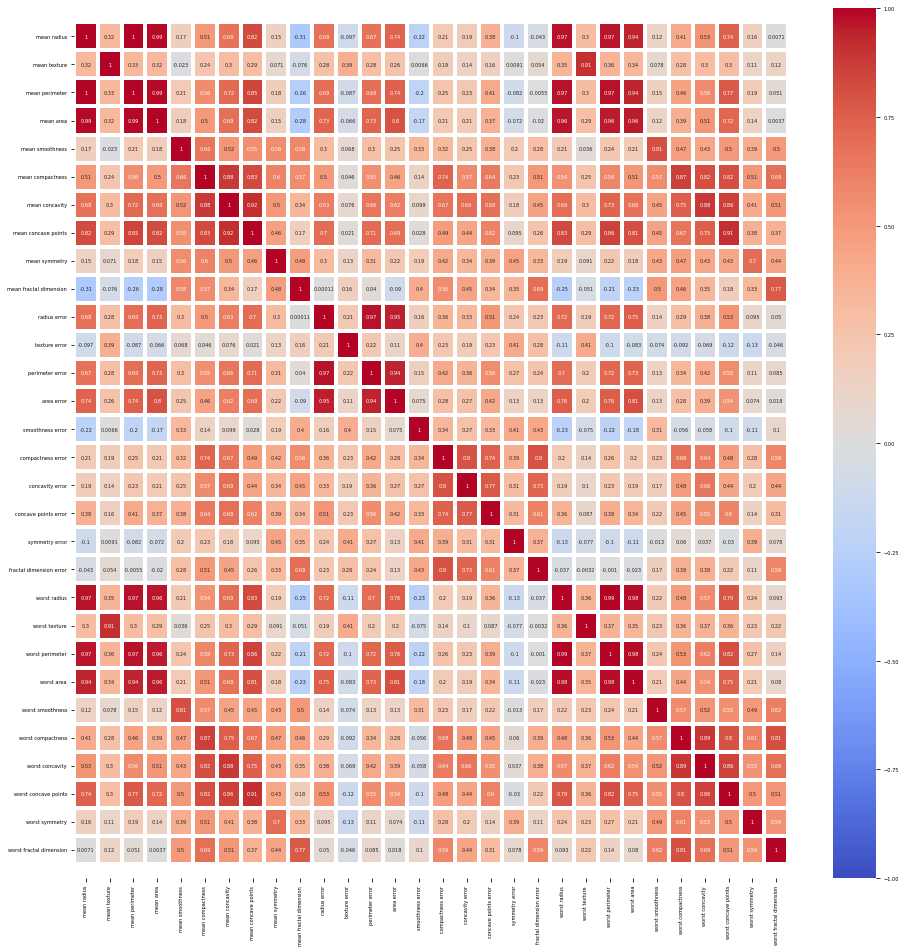

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,16))
plt.rc('font', size=5)
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           annot = True, # to show the correlation degree on cell
           vmin=-1,
           vmax=1,
           center= 0,
           fmt='0.2g', #
           cmap= 'coolwarm',
           linewidths=3, # cells partioning line width
           linecolor='white', # for spacing line color between cells
           square=False,#to make cells square 
           cbar_kws= {'orientation': 'vertical'}
           )

b, t = plt.ylim() 
b += 0.5  
t -= 0.5  
plt.ylim(b,t) 
plt.show()